In [1]:
# imports


import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import os
from env import get_connection

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [2]:
querry = """
       SELECT bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, fips, propertylandusetypeid FROM properties_2017
JOIN propertylandusetype USING(propertylandusetypeid)
WHERE propertylandusetypeid = 261;
        """

def get_zillow_data():
    '''
    This function reads in zillow data from Codeup database using sql querry into a df, 
    writes data to a csv file if a local file doesn't exist, and return df and if a local file exists
    return return df
    '''
    
    filename = "zillow_1.csv"

    if os.path.isfile(filename):
        return pd.read_csv(filename)
    else:
        # read the SQL query into a dataframe
        df = pd.read_sql(querry, get_connection('zillow'))

        # Write that dataframe to disk for later. Called "caching" the data for later.
        df.to_csv(filename, index=False)

        # Return the dataframe to the calling code
        return df  

In [3]:
# acquire data using a function
df = get_zillow_data()

# peak into data
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips,propertylandusetypeid
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0,261.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0,261.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0,261.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0,261.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0,261.0


In [4]:
# get number of rows and columns
df.shape

(2152863, 8)

In [5]:
# drop propertylandusetypeid
df.drop(columns='propertylandusetypeid',inplace=True)

In [6]:
# rename columns
df = df.rename(columns= { 'bedroomcnt':'bedrooms',
                         'bathroomcnt': 'bathrooms',
                         'calculatedfinishedsquarefeet': 'sqft',
                         'taxvaluedollarcnt': 'tax_value',
                         'yearbuilt': 'year_built'
                        })

In [7]:
# peak into data to see if column is dropped and columns are renamed
df.head(3)


,bedrooms,bathrooms,sqft,tax_value,year_built,taxamount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0


In [8]:
# check for Null values
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2152863 entries, 0 to 2152862
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   bedrooms    2152852 non-null  float64
 1   bathrooms   2152852 non-null  float64
 2   sqft        2144379 non-null  float64
 3   tax_value   2152370 non-null  float64
 4   year_built  2143526 non-null  float64
 5   taxamount   2148421 non-null  float64
 6   fips        2152863 non-null  float64
dtypes: float64(7)
memory usage: 115.0 MB


In [9]:
# check for Null values
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2152863 entries, 0 to 2152862
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   bedrooms    2152852 non-null  float64
 1   bathrooms   2152852 non-null  float64
 2   sqft        2144379 non-null  float64
 3   tax_value   2152370 non-null  float64
 4   year_built  2143526 non-null  float64
 5   taxamount   2148421 non-null  float64
 6   fips        2152863 non-null  float64
dtypes: float64(7)
memory usage: 115.0 MB


In [10]:
# get descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bedrooms,2152852.0,3.287196,0.954754,0.00,3.00,3.00,4.00,25.00
bathrooms,2152852.0,2.230688,0.999280,0.00,2.00,2.00,3.00,32.00
sqft,2144379.0,1862.855178,1222.125124,1.00,1257.00,1623.00,2208.00,952576.00
tax_value,2152370.0,461896.237963,699676.049600,1.00,188170.25,327671.00,534527.00,98428909.00
year_built,2143526.0,1960.949681,22.162196,1801.00,1949.00,1958.00,1976.00,2016.00
taxamount,2148421.0,5634.865978,8178.910249,1.85,2534.98,4108.95,6414.32,1337755.86
fips,2152863.0,6048.377335,20.433292,6037.00,6037.00,6037.00,6059.00,6111.00


In [11]:
# check for Null
# find the total number of Null values in each column
df.isnull().sum()

bedrooms        11
bathrooms       11
sqft          8484
tax_value      493
year_built    9337
taxamount     4442
fips             0
dtype: int64

In [12]:
# fill Null values
# df.fillna(0,inplace=True)

In [13]:
# drop Null values
df = df.dropna()

In [14]:
# check for Null
# find the total number of Null values in each column
df.isnull().sum()

bedrooms      0
bathrooms     0
sqft          0
tax_value     0
year_built    0
taxamount     0
fips          0
dtype: int64

In [15]:
# check unique values
for col in df.columns:
    print(f'{df[col].value_counts(dropna=False, ascending=True)}\n')
    print(f'Unique item count: {df[col].value_counts(dropna=False, ascending=True).count()}')
    print('____________________________')
    

25.0         1
16.0         2
18.0         3
15.0         5
14.0         7
12.0        12
13.0        15
11.0        34
10.0       118
9.0        290
8.0       1103
0.0       4397
7.0       4792
1.0      22895
6.0      25117
5.0     150671
2.0     334221
4.0     633608
3.0     962944
Name: bedrooms, dtype: int64

Unique item count: 19
____________________________
19.00         1
19.50         1
32.00         1
14.50         1
12.50         3
11.50         3
1.75          3
17.00         4
20.00         6
18.00         8
16.00        12
10.50        14
0.50         16
15.00        17
14.00        25
13.00        39
9.50         50
12.00        73
8.50        108
11.00       145
10.00       322
7.50        382
9.00        707
6.50       1330
8.00       1681
0.00       4274
7.00       4381
5.50       6201
6.00      10717
4.50      19474
5.00      28306
3.50      28464
1.50      31157
4.00      82039
2.50     142827
1.00     412582
3.00     422398
2.00     942463
Name: bathrooms, dtype: in

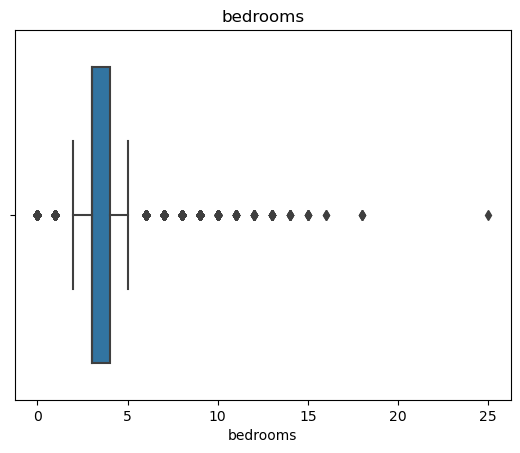

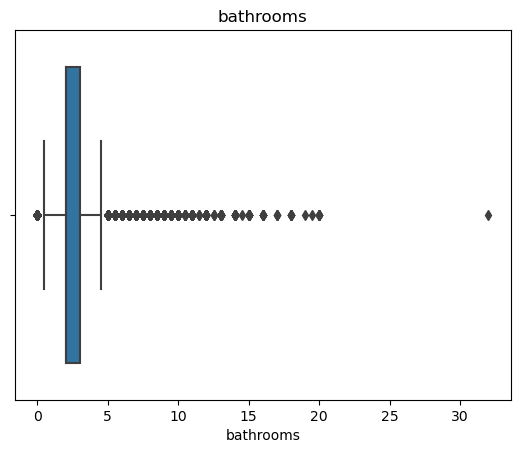

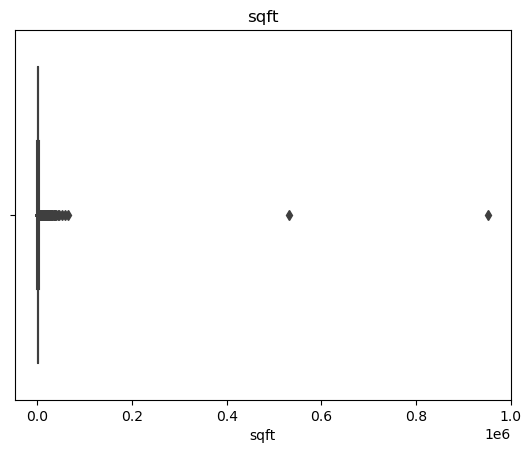

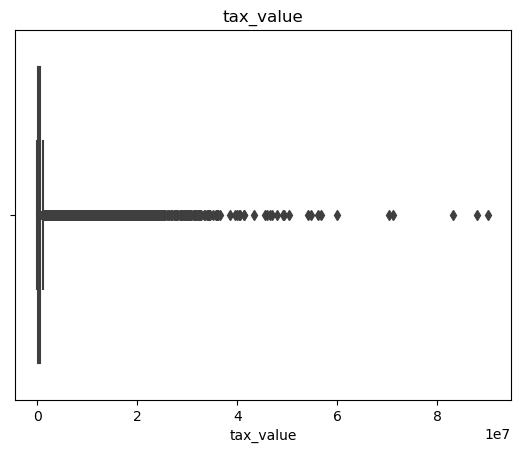

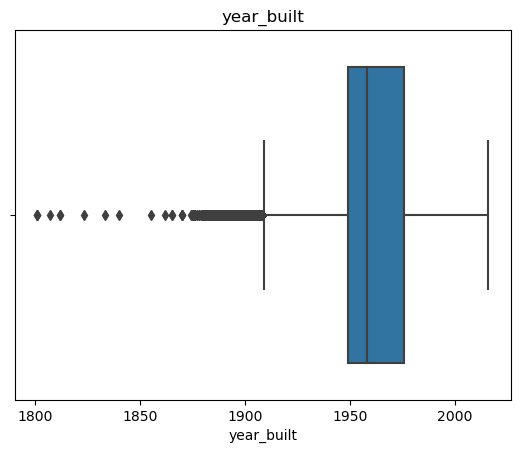

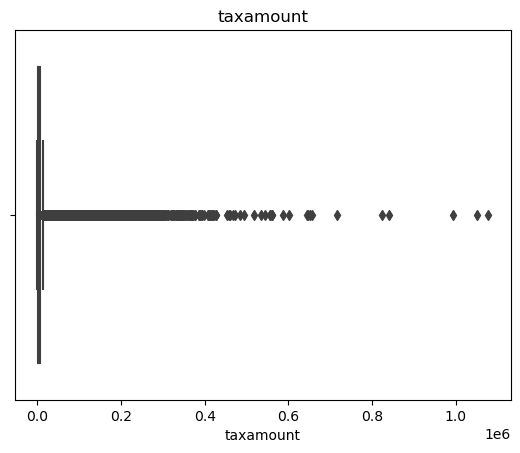

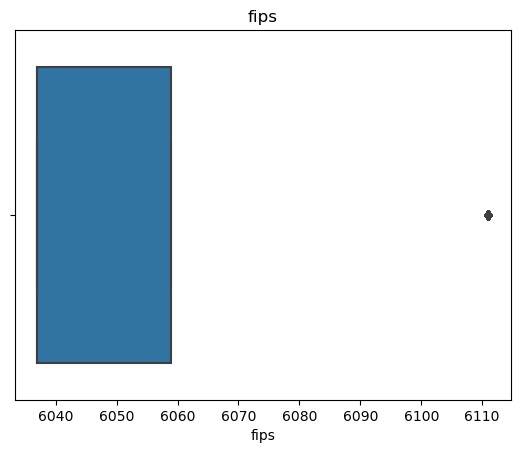

In [16]:
# box plot graph of each column
for col in df.columns:
    sns.boxplot(x=col, data=df)
    plt.title(col)
    plt.show()
    

In [17]:
# set seed
seed = 42
# split data into 80% train_validate, 20% test
train_validate, test = train_test_split(df, test_size=0.2, 
                                        random_state=seed)

# split train_validate data into 70% train, 30% validate
train, validate = train_test_split(train_validate, test_size=0.3, 
                                   random_state=seed)

train.shape, validate.shape, test.shape

((1198531, 7), (513657, 7), (428047, 7))